**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
suppressMessages(suppressWarnings(library(psych)))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Set global variable**

In [2]:
## init: region folder
vec = c("fcc_astarr_macs_input_overlap", "fcc_astarr_macs_input_union")
names(vec) = vec

VEC_TXT_FOLDER = vec
for (txt in vec) {cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**Check input files**

In [3]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_folder, "summary")
txt_fname  = "region.coverage.score.fcc.*.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_coverage_fcc_score/fcc_astarr_macs_input_overlap/summary/region.coverage.score.fcc.final.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_coverage_fcc_score/fcc_astarr_macs_input_overlap/summary/region.coverage.score.fcc.total.tsv 


## Import data

In [4]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(
        FD_RES, "region_coverage_fcc_score", 
        txt_folder, 
        "summary"
    )
    txt_fname = "region.coverage.score.fcc.final.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 432928     11

$fcc_astarr_macs_input_union
[1] 639718     11



Chrom,ChromStart,ChromEnd,Region,Score,Zcore,Score_Label,Zcore_Label,Assay_Folder,Assay_Group,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
chr1,10038,10405,chr1:10038-10405,-2.23485265,-3.5573621,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ASTARR
chr1,14282,14614,chr1:14282-14614,0.03179044,0.0361388,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ASTARR
chr1,16025,16338,chr1:16025-16338,-1.33934060,-2.1376311,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ASTARR


**Explore**

In [5]:
lst = lst_dat_region_score_import
lst = lapply(lst, function(dat){
    res = table(dat$Assay_Label, dnn = "Assay")
    dat = as.data.frame(res)
    return(dat)
})

dat = bind_rows(lst, .id = "Region")
dat = dat %>% tidyr::spread(Region, Freq)
fun_display_table(dat)

Assay,fcc_astarr_macs_input_overlap,fcc_astarr_macs_input_union
ASTARR,150040,246850
CRISPRi-Growth,72743,80288
CRISPRi-HCRFF,925,1330
LMPRA,61478,68497
TMPRA,1148,1722
WSTARR,146594,241031


## Arrange table

In [6]:
txt = "fcc_astarr_macs_input_union"
lst = lst_dat_region_score_import
dat = lst[[txt]]

dat_region_score_import = dat
fun_display_table(head(dat, 3))

Chrom,ChromStart,ChromEnd,Region,Score,Zcore,Score_Label,Zcore_Label,Assay_Folder,Assay_Group,Assay_Label
chr1,10015,10442,chr1:10015-10442,-2.1177891,-3.7814427,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ASTARR
chr1,14253,14645,chr1:14253-14645,0.3206124,0.5653917,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ASTARR
chr1,16015,16477,chr1:16015-16477,-1.1744478,-2.0997884,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ASTARR


In [7]:
dat = dat_region_score_import
dat = dat %>% 
    dplyr::mutate(Assay = Assay_Label) %>%
    dplyr::select(Region, Zcore, Assay) %>%
    tidyr::spread(Assay, Zcore)

dat_region_score_arrange = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 246851      7


Region,ASTARR,CRISPRi-Growth,CRISPRi-HCRFF,LMPRA,TMPRA,WSTARR
chr1:100006256-100006880,0.1455252,NA,NA,NA,NA,-1.283181
chr1:100010437-100010915,-1.2667511,NA,NA,NA,NA,-0.802340
chr1:10002087-10003910,-0.4550979,NA,NA,NA,NA,-1.009224


## Explore: pairwise scatter plot

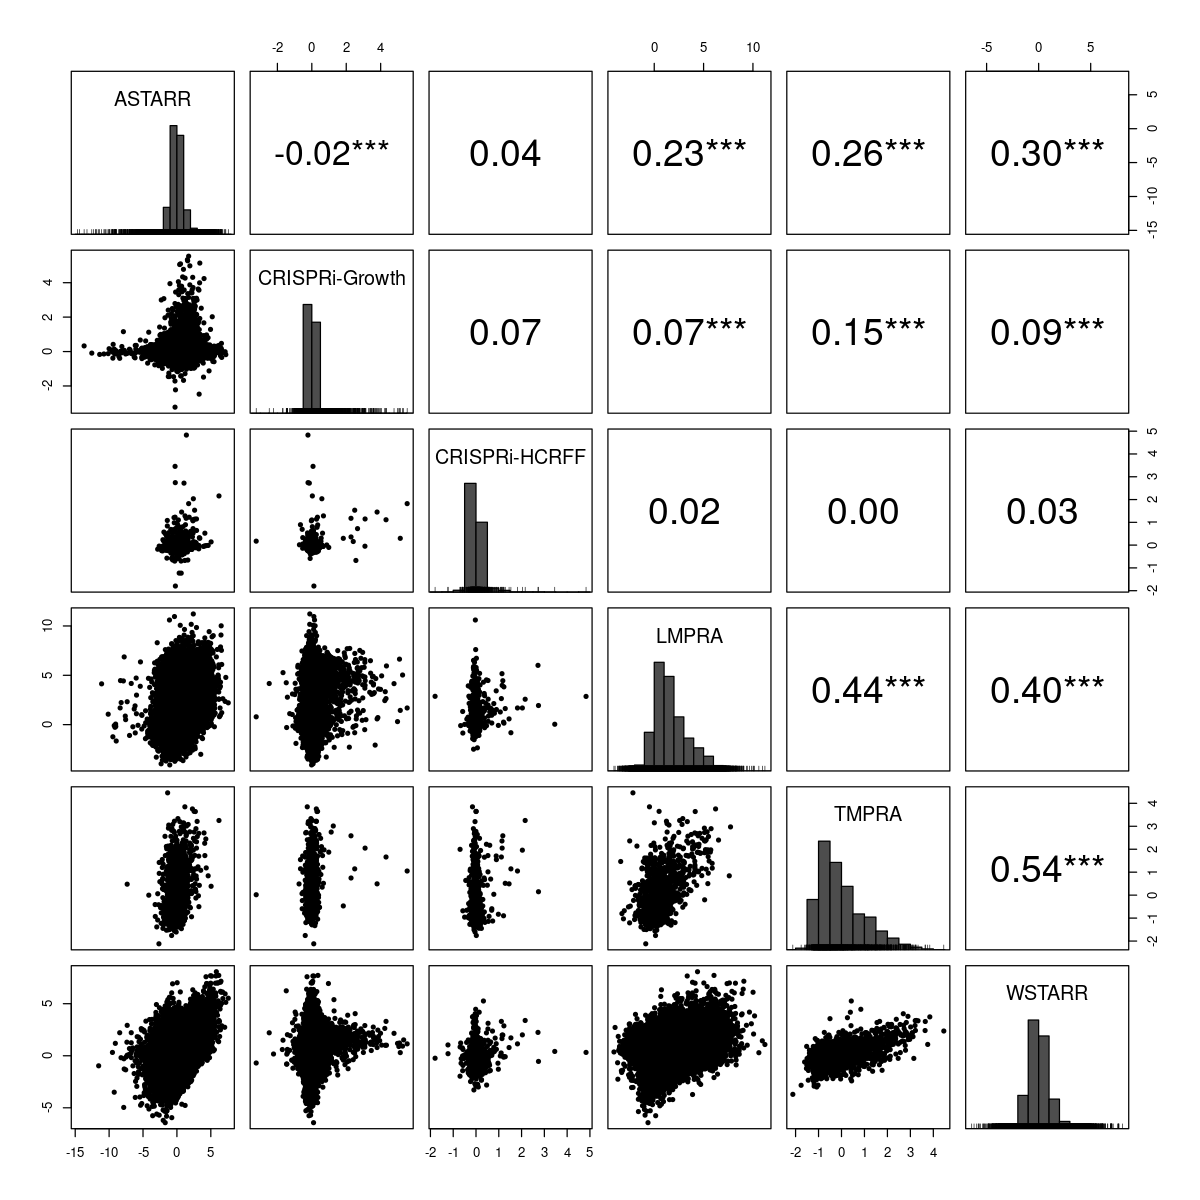

In [8]:
dat = dat_region_score_arrange
dat = dat %>% 
    tibble::column_to_rownames("Region") %>%
    as.matrix

options(repr.plot.height = 10, repr.plot.width = 10)
pairs.panels(
    dat,
    smooth = FALSE,      # If TRUE, draws loess smooths
    scale = FALSE,       # If TRUE, scales the correlation text font
    density = FALSE,     # If TRUE, adds density plots and histograms
    ellipses = FALSE,    # If TRUE, draws ellipses
    method = "spearman", # Correlation method (also "spearman" or "kendall")
    pch = 20,            # pch symbol
    lm  = FALSE,         # If TRUE, plots linear fit rather than the LOESS (smoothed) fit
    cor = TRUE,          # If TRUE, reports correlations
    jiggle = FALSE,      # If TRUE, data points are jittered
    factor = 2,          # Jittering factor
    hist.col = "grey30", # Histograms color
    stars = TRUE,        # If TRUE, adds significance level with stars
    ci = FALSE,          # If TRUE, adds confidence intervals
    # text‐size controls specific to pairs.panels():
    cex.labels = 1.5,    # diagonal labels
    cex.cor    = 1.5     # correlation text
)           

## Explore: hex scatter plot

### Test

In [9]:
vec_txt_assay = c("ASTARR", "WSTARR")
txt_assay1 = vec_txt_assay[1]
txt_assay2 = vec_txt_assay[2]

dat = dat_region_score_arrange
dat = dat %>%
    dplyr::select(Region, !!!vec_txt_assay) %>%
    na.omit

dat_region_score_subset = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 241030      3


Region,ASTARR,WSTARR
chr1:100006256-100006880,0.1455252,-1.283181
chr1:100010437-100010915,-1.2667511,-0.802340
chr1:10002087-10003910,-0.4550979,-1.009224


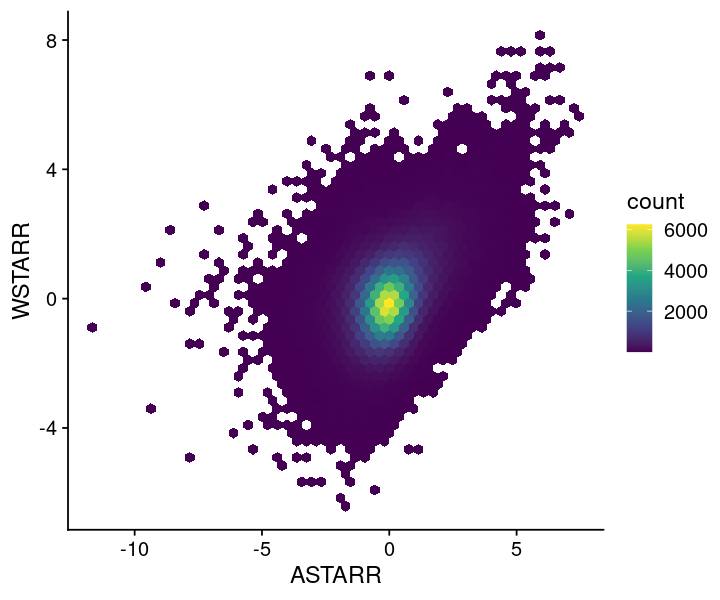

In [10]:
dat = dat_region_score_subset

gpt = ggplot(dat, aes(x=.data[["ASTARR"]], y=.data[["WSTARR"]])) + 
    geom_hex(bins = 50) +
    theme_cowplot() +
    scale_fill_viridis_c()

options(repr.plot.height = 5, repr.plot.width = 6)
print(gpt)

Warning message:
“Removed 74 rows containing non-finite outside the scale range (`stat_binhex()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_hex()`).”


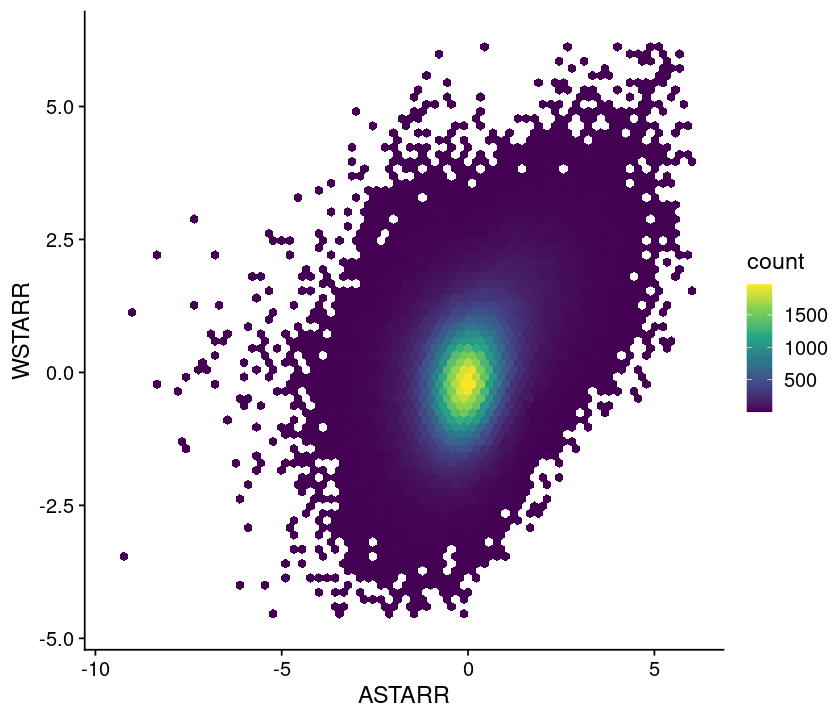

In [11]:
vec_txt_assay = c("ASTARR", "WSTARR")
txt_assay1 = vec_txt_assay[1]
txt_assay2 = vec_txt_assay[2]

num_prob = 0.0001
vec_num_prob   = c(num_prob, 1-num_prob)
vec_num_score1 = dat_region_score_arrange[[txt_assay1]]
vec_num_score2 = dat_region_score_arrange[[txt_assay2]]
vec_num_range1 = quantile(vec_num_score1, probs = vec_num_prob, na.rm = "TRUE")
vec_num_range2 = quantile(vec_num_score2, probs = vec_num_prob, na.rm = "TRUE")

dat = dat_region_score_arrange
dat = dat %>% dplyr::select({{vec_txt_assay}}) %>% na.omit

gpt = ggplot(dat, aes(x=.data[["ASTARR"]], y=.data[["WSTARR"]])) + 
    geom_hex(bins=70) +
    scale_fill_viridis_c() +
    theme_cowplot() +
    xlim(vec_num_range1) +
    ylim(vec_num_range2)

options(repr.plot.height=6, repr.plot.width=7)
print(gpt)

### Loop

In [12]:
vec = c("ASTARR", "LMPRA", "TMPRA", "WSTARR", "CRISPRi-Growth", "CRISPRi-HCRFF")
names(vec) = vec

vec_txt_assay = vec

In [13]:
vec = vec_txt_assay
dat = combn(vec, 2)
dat = data.frame(dat)

dat_assay_comb2 = dat
fun_display_table(dat)

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15
ASTARR,ASTARR,ASTARR,ASTARR,ASTARR,LMPRA,LMPRA,LMPRA,LMPRA,TMPRA,TMPRA,TMPRA,WSTARR,WSTARR,CRISPRi-Growth
LMPRA,TMPRA,WSTARR,CRISPRi-Growth,CRISPRi-HCRFF,TMPRA,WSTARR,CRISPRi-Growth,CRISPRi-HCRFF,WSTARR,CRISPRi-Growth,CRISPRi-HCRFF,CRISPRi-Growth,CRISPRi-HCRFF,CRISPRi-HCRFF


In [14]:
lst = lapply(dat_assay_comb2, function(vec){
    txt = paste(vec, collapse = "_")
    txt = str_replace_all(txt, "-", "_")
    return(txt)
})
vec = unlist(lst)

vec_txt_assay_pair = vec
print(vec)

                            X1                             X2 
                "ASTARR_LMPRA"                 "ASTARR_TMPRA" 
                            X3                             X4 
               "ASTARR_WSTARR"        "ASTARR_CRISPRi_Growth" 
                            X5                             X6 
        "ASTARR_CRISPRi_HCRFF"                  "LMPRA_TMPRA" 
                            X7                             X8 
                "LMPRA_WSTARR"         "LMPRA_CRISPRi_Growth" 
                            X9                            X10 
         "LMPRA_CRISPRi_HCRFF"                 "TMPRA_WSTARR" 
                           X11                            X12 
        "TMPRA_CRISPRi_Growth"          "TMPRA_CRISPRi_HCRFF" 
                           X13                            X14 
       "WSTARR_CRISPRi_Growth"         "WSTARR_CRISPRi_HCRFF" 
                           X15 
"CRISPRi_Growth_CRISPRi_HCRFF" 


[1] 15


Warning message:
“Removed 38 rows containing non-finite outside the scale range (`stat_binhex()`).”
Warning message:
“Removed 7 rows containing missing values or values outside the scale range
(`geom_hex()`).”


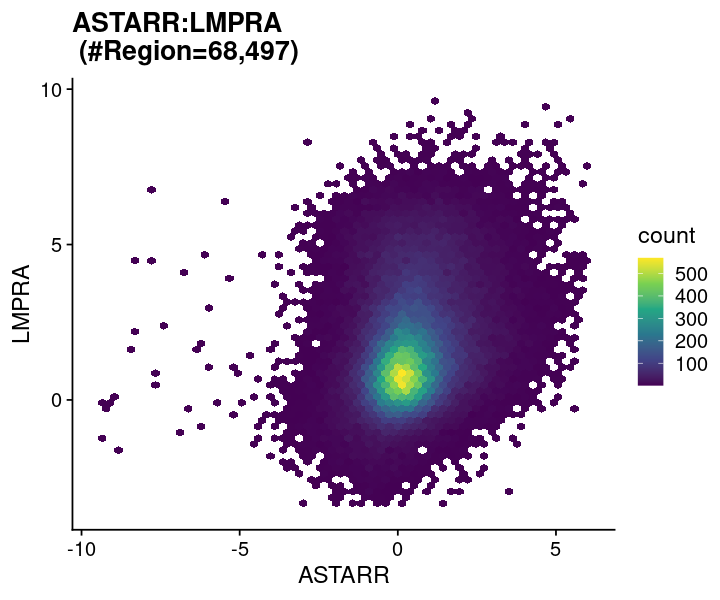

In [15]:
lst = lapply(dat_assay_comb2, function(idxs){
    ### get index
    txt_assay1 = idxs[1]
    txt_assay2 = idxs[2]

    ### set axis range
    num_prob       = 0.0001
    vec_num_prob   = c(num_prob, 1-num_prob)
    vec_num_score1 = dat_region_score_arrange[[txt_assay1]]
    vec_num_score2 = dat_region_score_arrange[[txt_assay2]]
    vec_num_range1 = quantile(vec_num_score1, probs = vec_num_prob, na.rm = "TRUE")
    vec_num_range2 = quantile(vec_num_score2, probs = vec_num_prob, na.rm = "TRUE")

    ### get scores in regions overlapped
    dat = dat_region_score_arrange
    dat = dat %>% dplyr::select({{idxs}}) %>% na.omit

    ### set title
    num  = nrow(dat)
    txt1 = paste0(txt_assay1, ":", txt_assay2)
    txt2 = paste0("(", "#Region=", scales::comma(num), ")")
    txt_title = paste(txt1, "\n", txt2)
    
    ### generate plot
    gpt = ggplot(dat, aes(x=.data[[txt_assay1]], y=.data[[txt_assay2]])) + 
        geom_hex(bins=60) +
        scale_fill_viridis_c() +
        theme_cowplot() +
        xlim(vec_num_range1) +
        ylim(vec_num_range2) +
        labs(title = txt_title)
    return(gpt)
})
names(lst) = vec_txt_assay_pair

### assign and show
lst_gpt_scatter_pair = lst
print(length(lst))

gpt = lst[[1]]

options(repr.plot.height=5, repr.plot.width=6)
print(gpt)

Warning message:
“Removed 38 rows containing non-finite outside the scale range (`stat_binhex()`).”
Warning message:
“Removed 7 rows containing missing values or values outside the scale range
(`geom_hex()`).”
Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_binhex()`).”
Warning message:
“Removed 74 rows containing non-finite outside the scale range (`stat_binhex()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_hex()`).”
Warning message:
“Removed 46 rows containing non-finite outside the scale range (`stat_binhex()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_hex()`).”
Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_binhex()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_binhex()`).”
Warning message:
“Removed 41 rows containing non-finite outside the scale

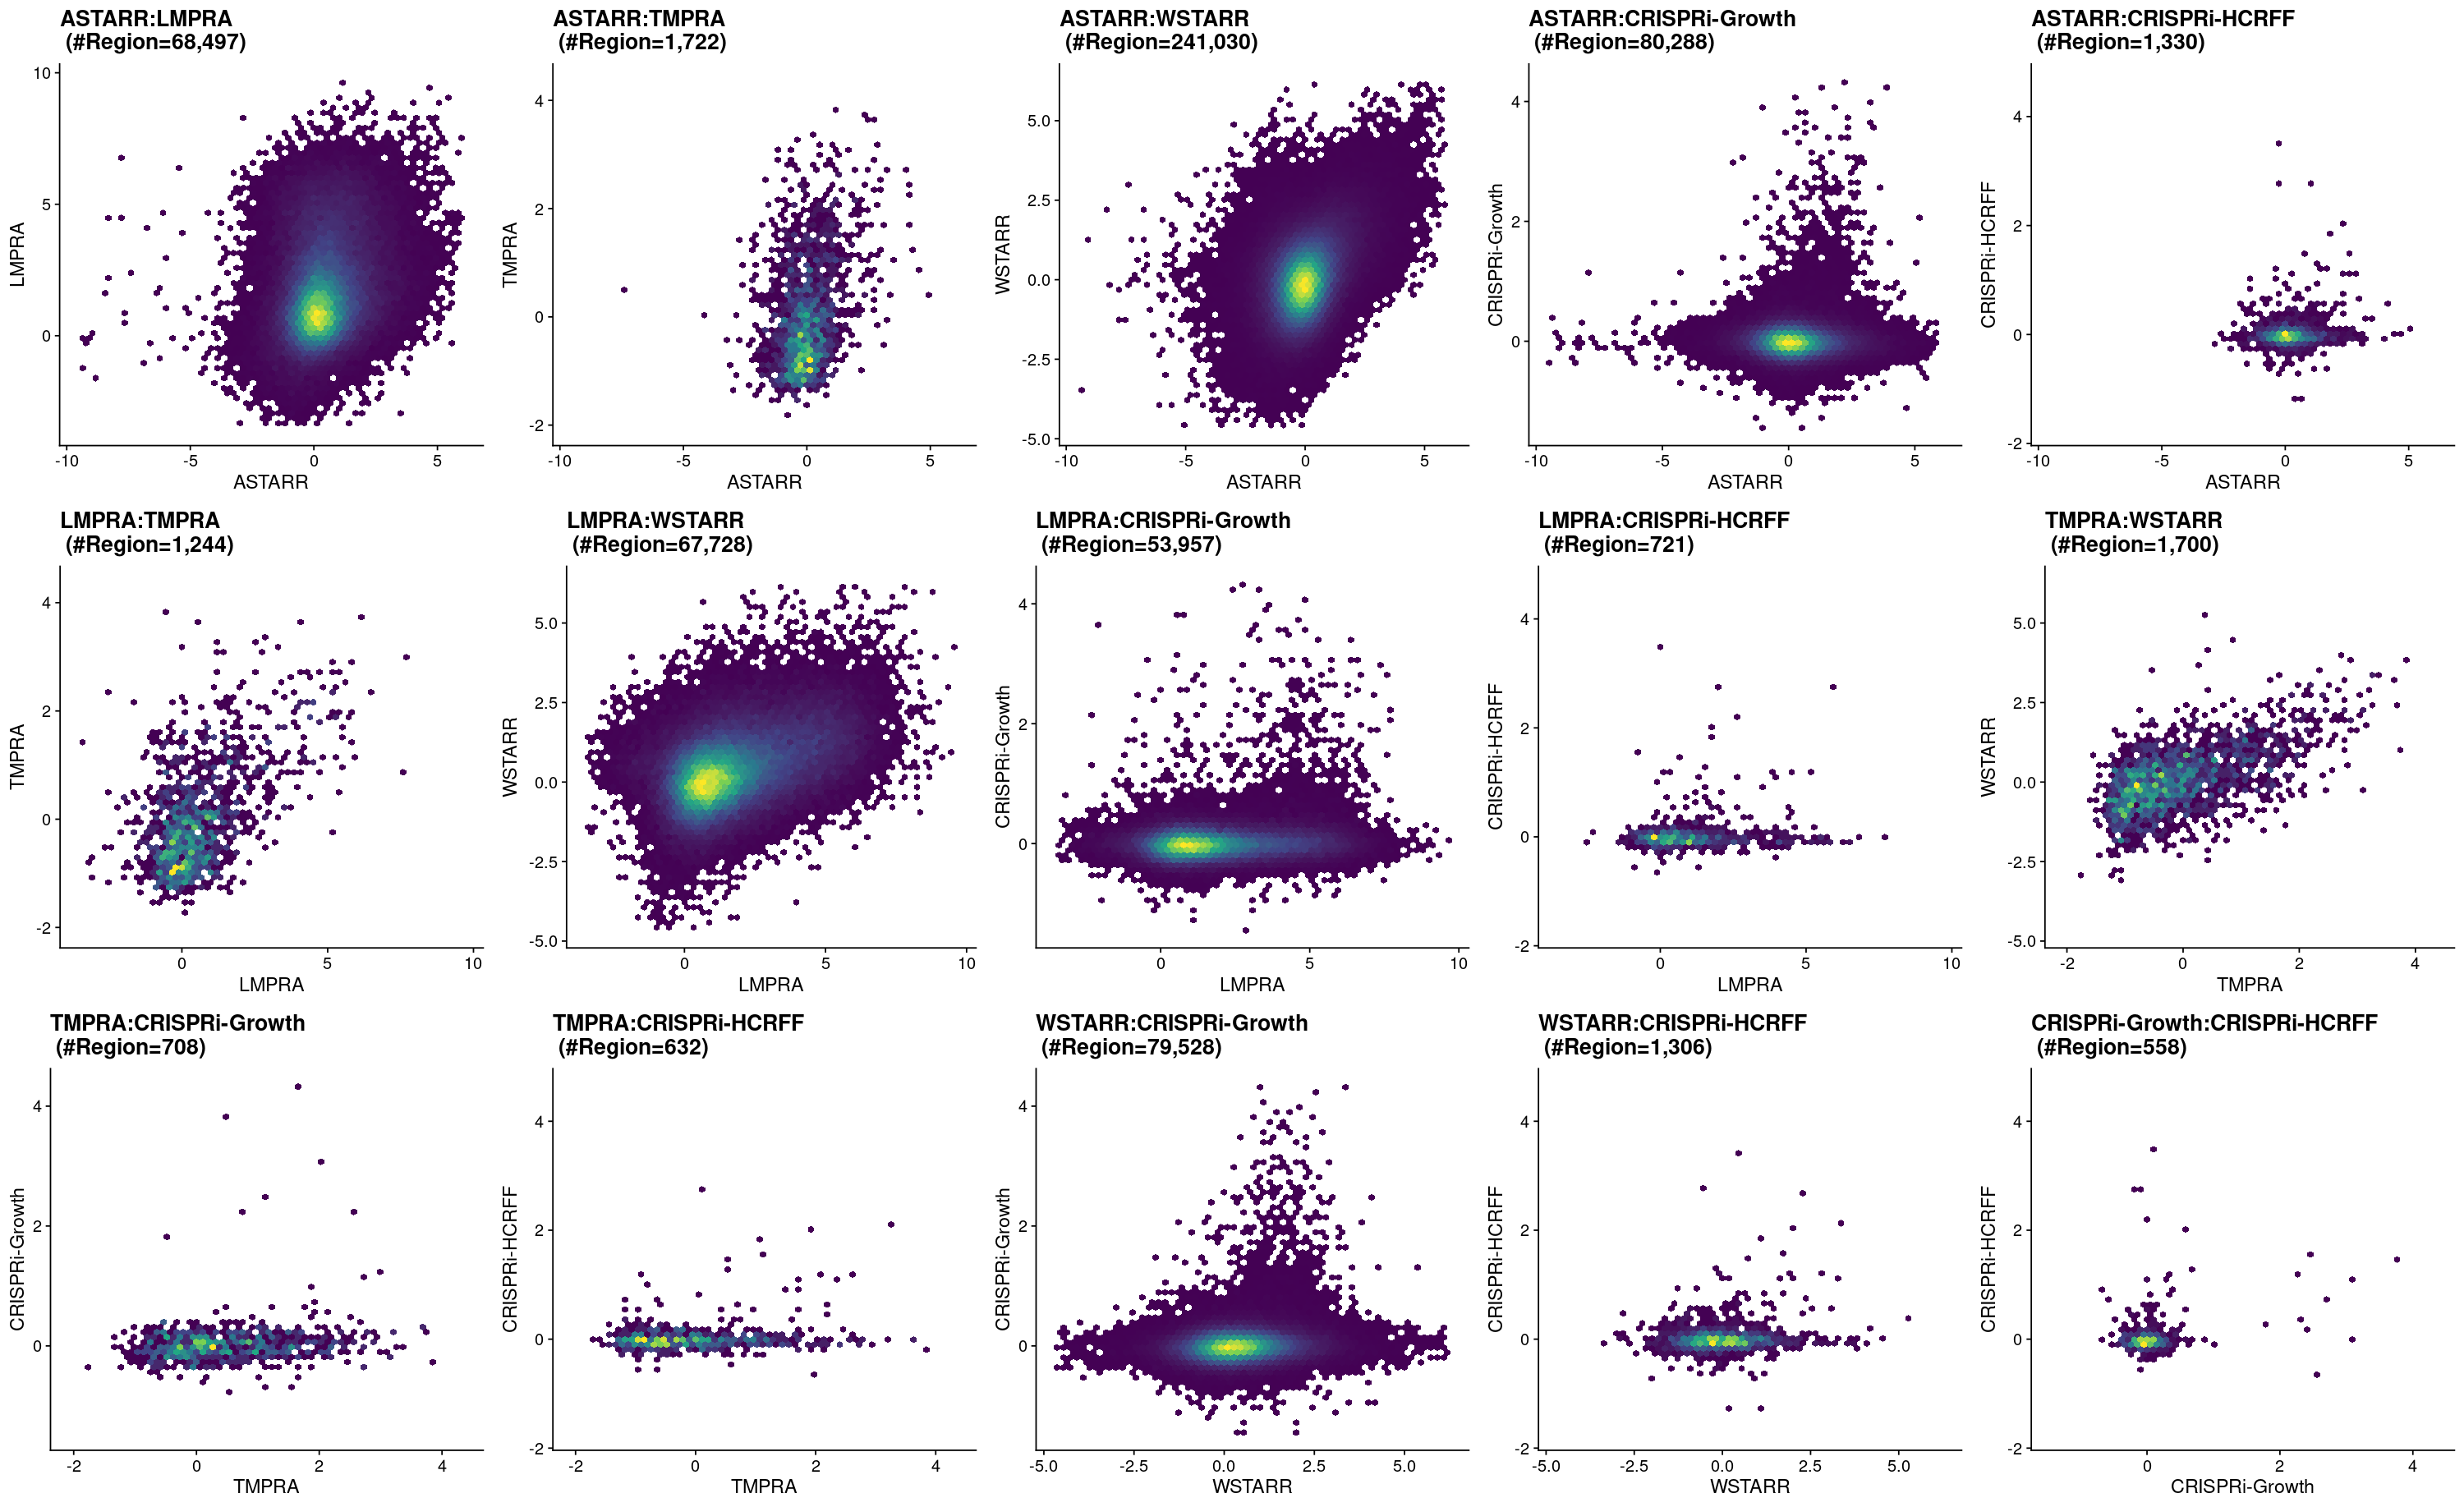

In [16]:
### arrange plots
lst = lst_gpt_scatter_pair
lst = lapply(lst, function(gpt){
    gpt = gpt + theme(legend.position = "None")
    return(gpt)
})

### generate plot
plt = plot_grid(plotlist = lst, nrow = 3, ncol = 5)

### assign and show
plt_scatter_pair_grid = plt
options(repr.plot.height=5.1*3, repr.plot.width=5*5)
print(plt)

## Export results

**Save plot grid**

In [17]:
plt_export = plt_scatter_pair_grid
txt_export = "fig.region_coverage_fcc.scatter_hex.zscore.grid"

txt_fdiry = "./"
txt_fname = paste(txt_export, "png", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 5.1*3, width = 5*5, units = "in")

txt_fdiry = "./"
txt_fname = paste(txt_export, "svg", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 5.1*3, width = 5*5, units = "in")

**Save each scatter plot**

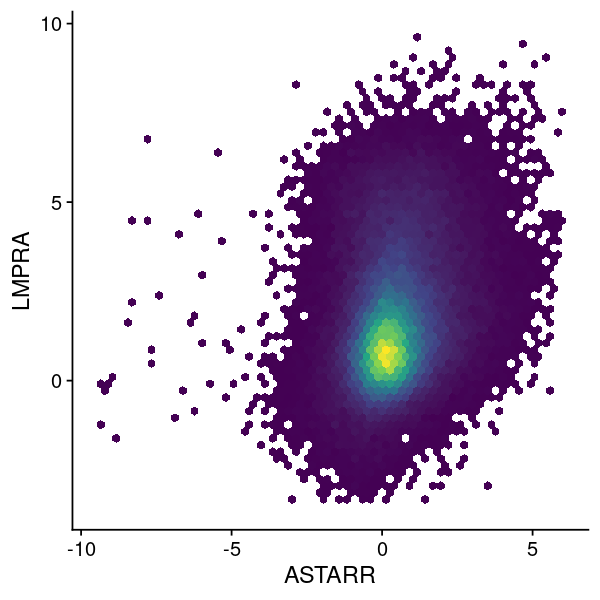

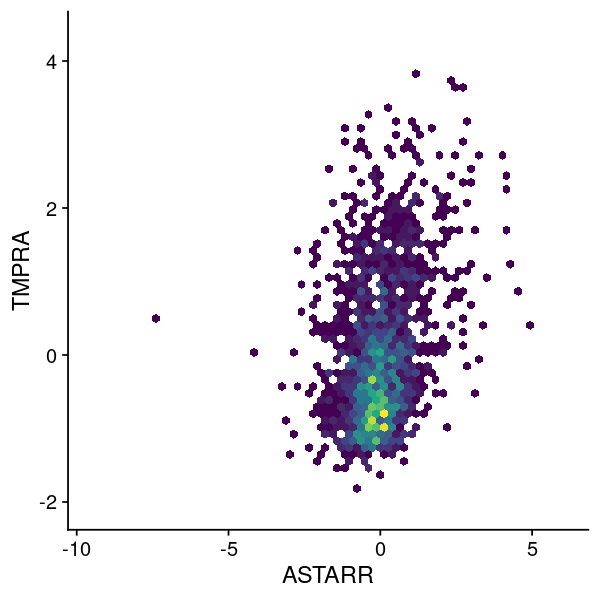

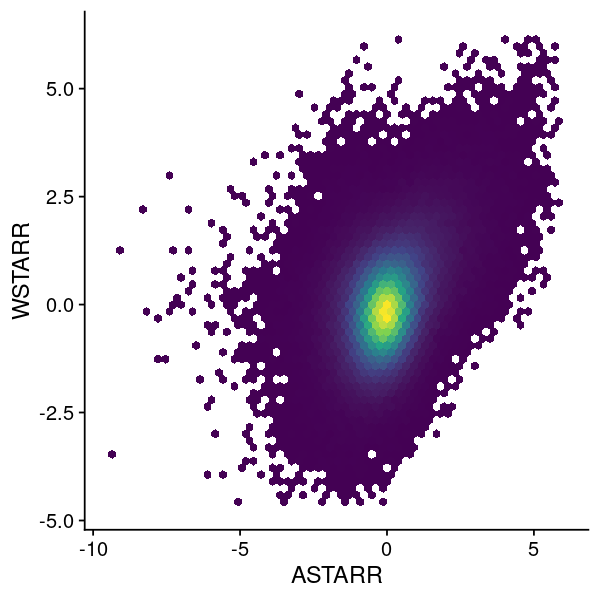

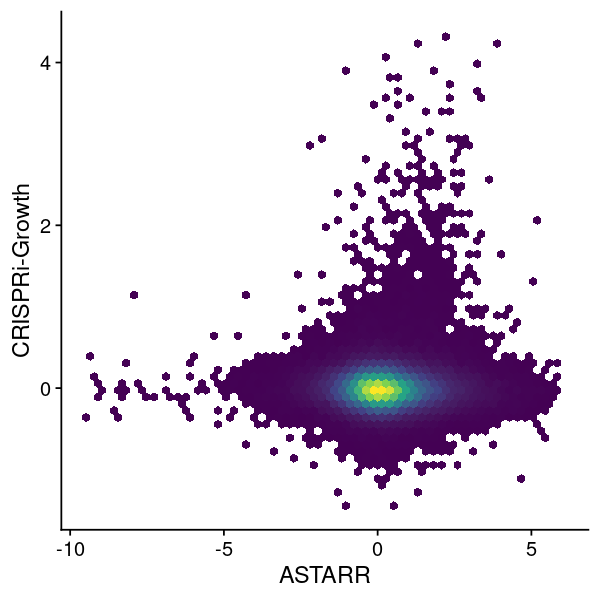

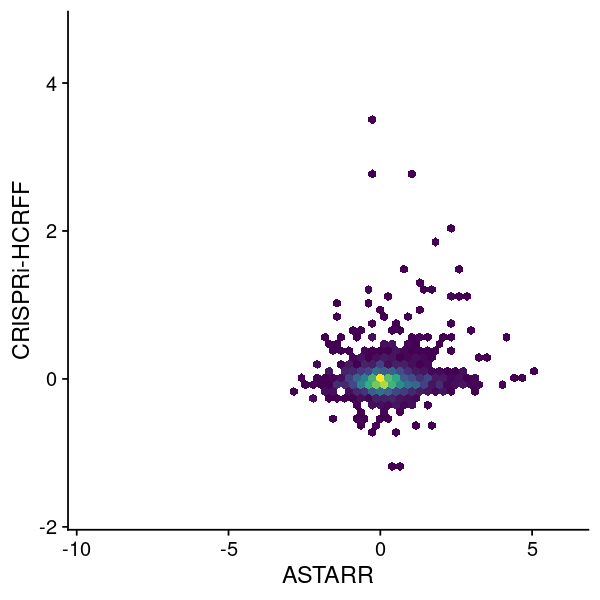

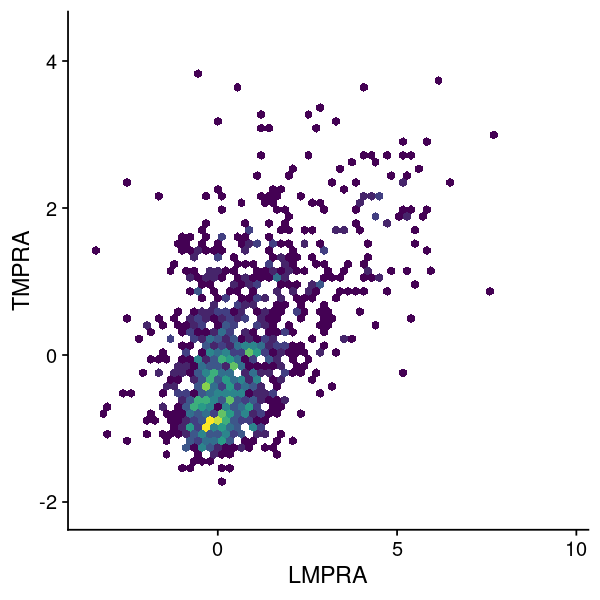

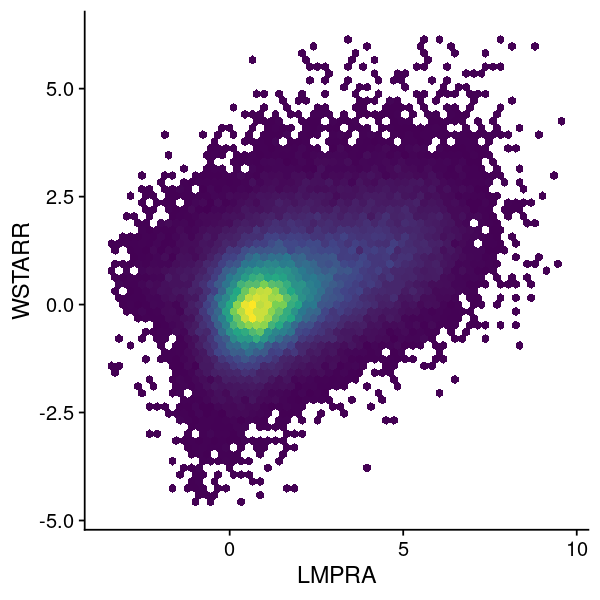

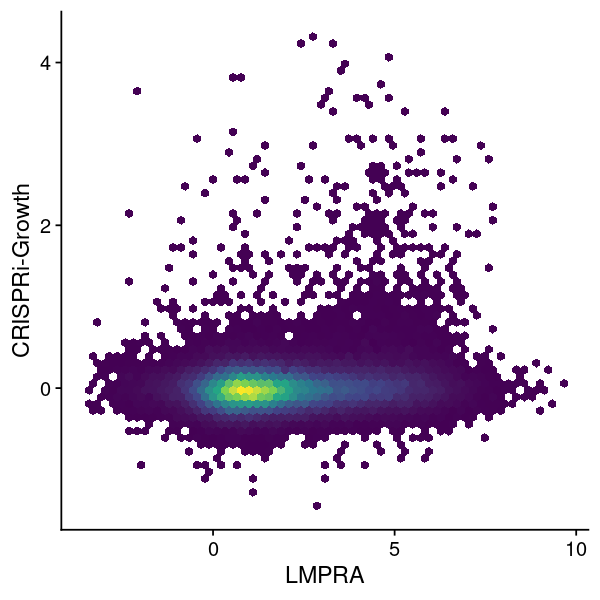

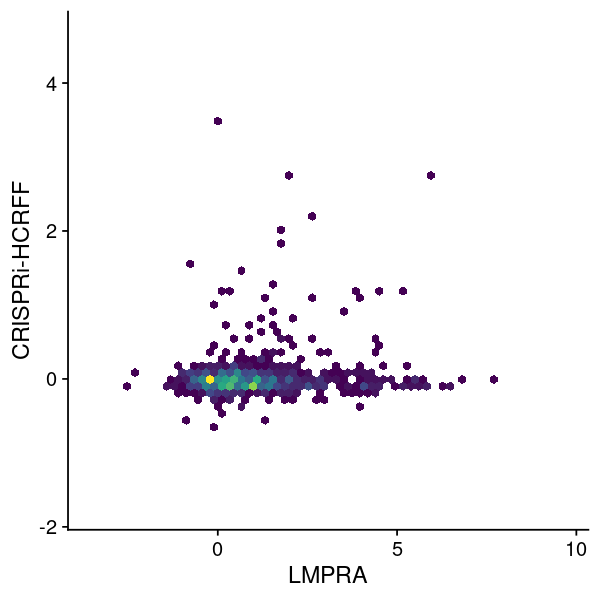

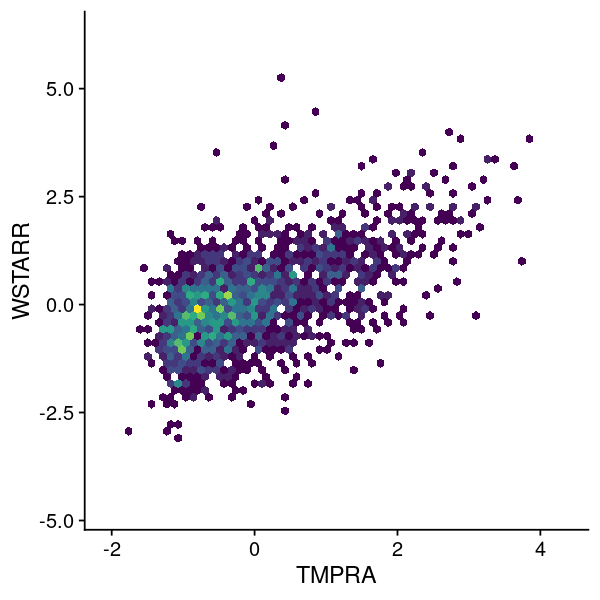

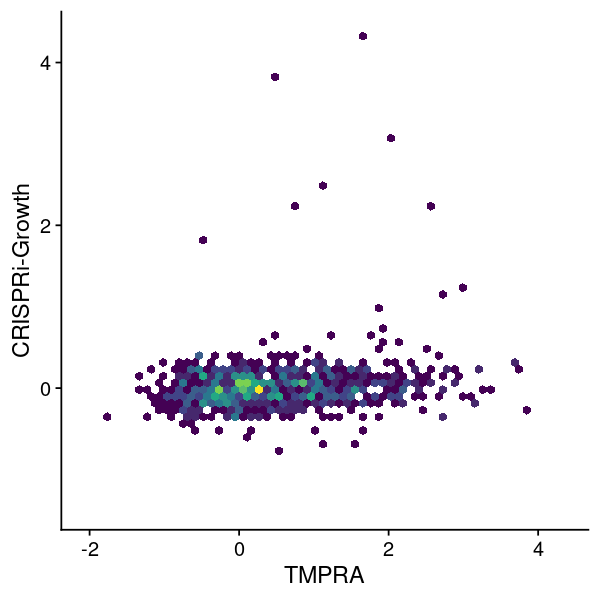

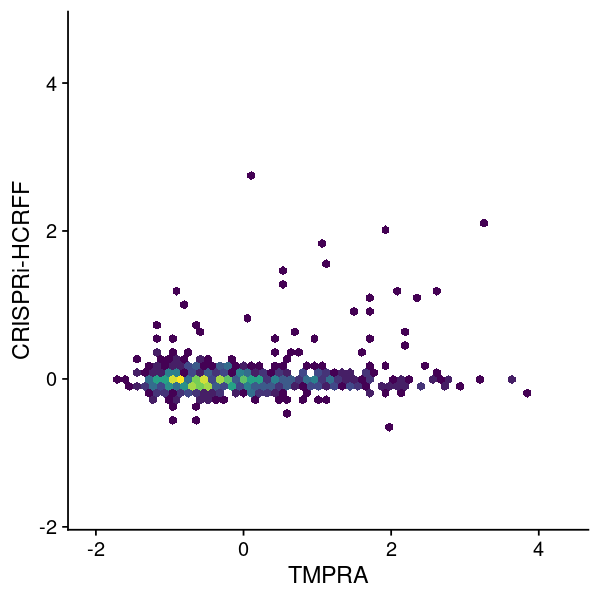

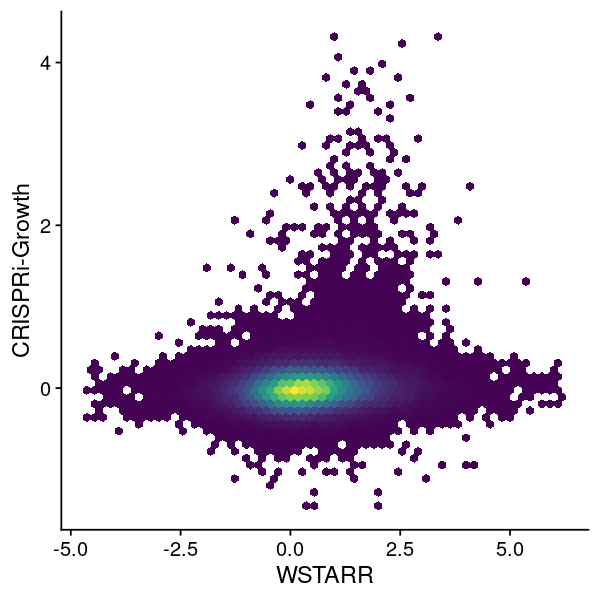

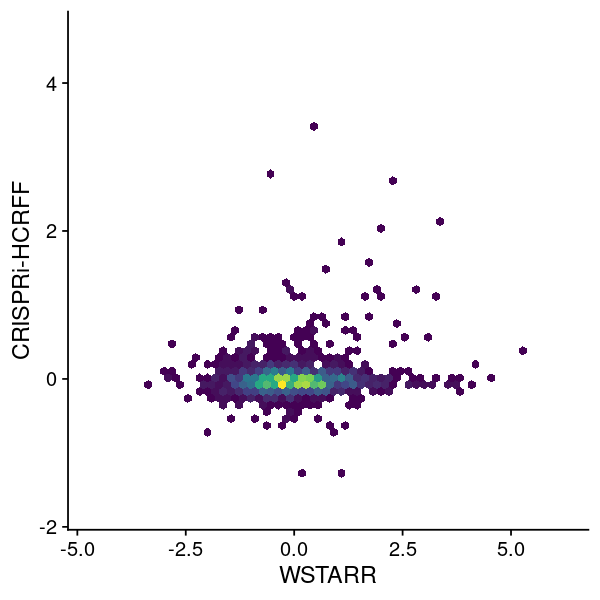

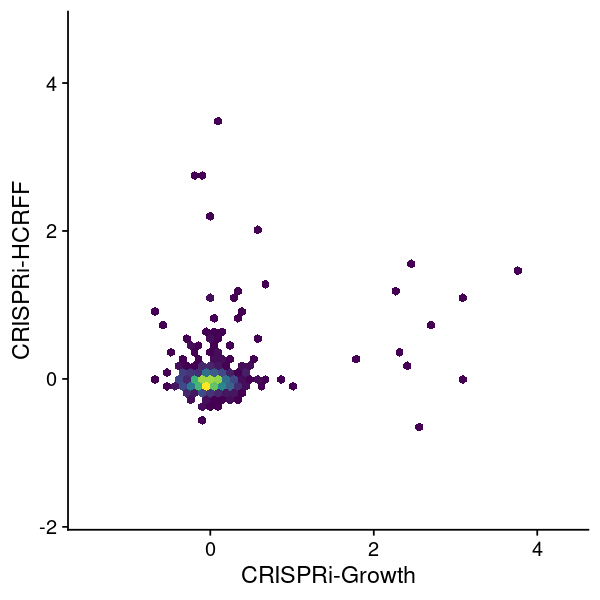

In [19]:
options(repr.plot.height=5, repr.plot.width=5)
lst = lst_gpt_scatter_pair
for (txt in names(lst)){
    ### show progress
    gpt = lst[[txt]]
    gpt = gpt + 
        theme(plot.title = element_blank()) +
        theme(legend.position = "None")
    suppressWarnings(print(gpt))

    ### save plot
    txt_fdiry = "."
    #txt_fname = paste0("fig_hex_pair_", txt, ".png")
    txt_fname = paste0("fig.region_coverage_fcc.scatter_hex.zscore.", txt, ".png")
    txt_fpath = file.path(txt_fdiry, txt_fname)
    
    gpt = gpt + labs(x="", y="")
    suppressWarnings(ggsave(txt_fpath, gpt, width = 3, height = 3))
}